# Analyzing Portfolio Risk and Return

In [16]:
# Import the required libraries and dependencies
import pandas as pd
from pathlib import Path
import numpy as np
%matplotlib inline


In [2]:
# Import csv file containing the data, set date column as index, and review imported dataframe
whales_df = pd.read_csv(
    Path('Resources\whale_navs.csv'),
    index_col='date',
    parse_dates=True,
    infer_datetime_format=True)
whales_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2014-10-01,31.950240,14.991826,59.977830,51.948712,194.35
2014-10-02,31.936110,14.994072,59.978626,51.957619,194.38
2014-10-03,31.969707,14.999596,60.002264,52.022484,196.52
2014-10-06,32.048215,14.999471,60.006244,52.036387,196.29
2014-10-07,31.964216,14.994720,59.993735,52.005864,193.26


In [4]:
# Create new dataframe with daily returns for each day
whales_daily_returns = whales_df.pct_change().dropna()
whales_daily_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2014-10-02,-0.000442,0.000150,0.000013,0.000171,0.000154
2014-10-03,0.001052,0.000368,0.000394,0.001248,0.011009
2014-10-06,0.002456,-0.000008,0.000066,0.000267,-0.001170
2014-10-07,-0.002621,-0.000317,-0.000208,-0.000587,-0.015436
2014-10-08,0.000390,0.000369,0.000242,0.000842,0.017489


---

## Quantitative Analysis

###  Analyze the Performance

<AxesSubplot:title={'center':'Whale Daily Returns'}, xlabel='date'>

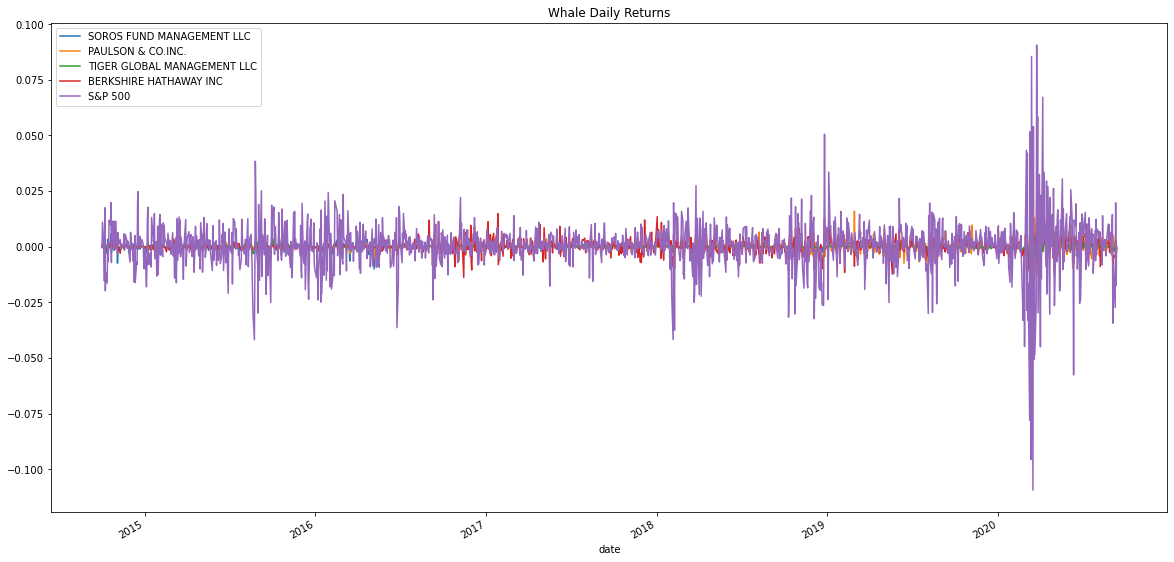

In [5]:
# Plot the daily return data of the 4 funds and the S&P 500 
whales_daily_returns.plot(figsize=(20,10), title='Whale Daily Returns')


In [7]:
# Calculate cumulative returns and review end of dataframe
whales_cumulative_returns = (1 + whales_daily_returns).cumprod()
whales_cumulative_returns.tail()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2020-09-04,0.987355,0.958187,1.055714,1.244856,1.762645
2020-09-08,0.985640,0.956378,1.054373,1.238608,1.714484
2020-09-09,0.986739,0.958409,1.057221,1.240858,1.748341
2020-09-10,0.985498,0.959740,1.055539,1.237883,1.717983
2020-09-11,0.985086,0.957887,1.055081,1.236625,1.718858


<AxesSubplot:title={'center':'Whale Cumulative Returns'}, xlabel='date'>

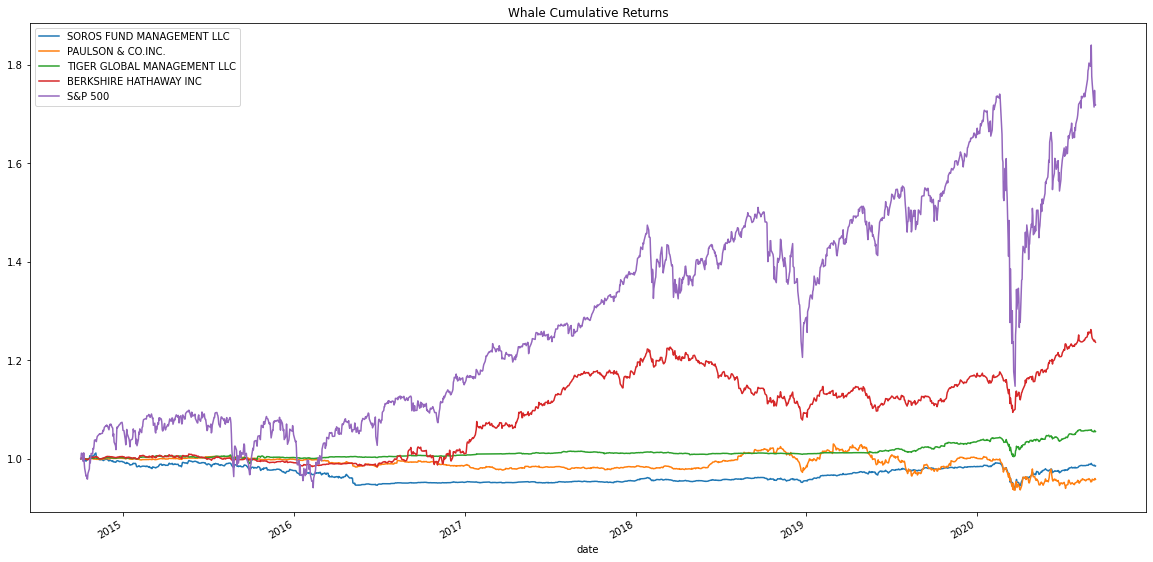

In [8]:
# Plot cumulative returns
whales_cumulative_returns.plot(figsize=(20,10), title='Whale Cumulative Returns')


**Question** Based on the cumulative return data and the visualization, do any of the four fund portfolios outperform the S&P 500 Index?

**Answer** Based on the above plot, it can be seen that none of the four fund portfolios outperfrom the S&P index.

---

### Analyze the Volatility

<AxesSubplot:title={'center':'Whale Daily Returns'}>

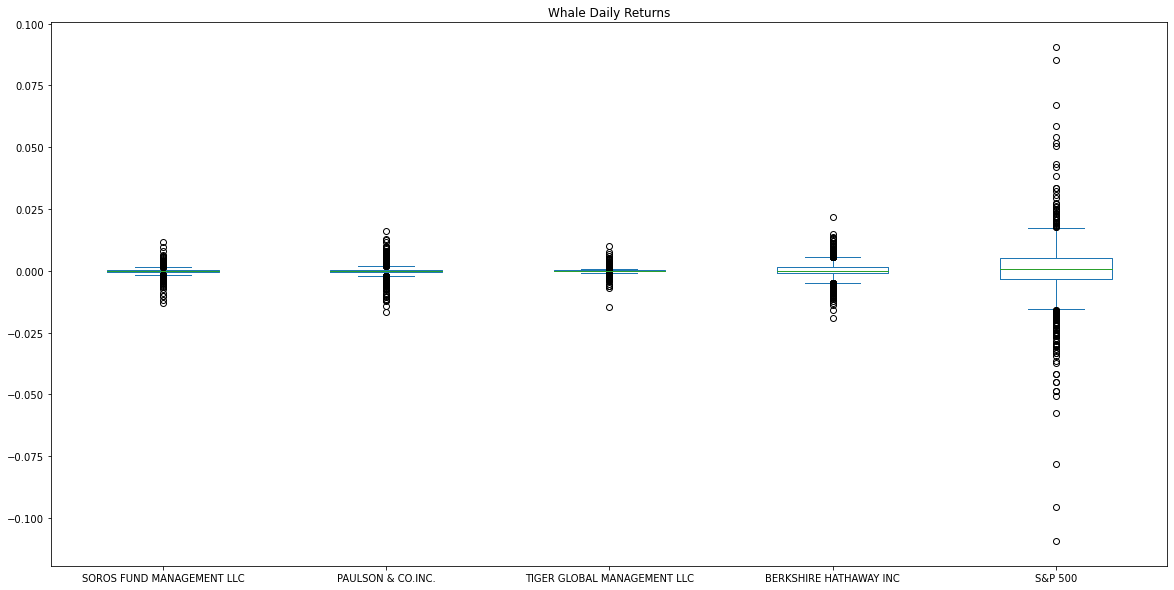

In [9]:
# Plot daily returns using box plot to display volatility
whales_daily_returns.plot.box(figsize=(20,10), title='Whale Daily Returns')


<AxesSubplot:title={'center':'Whale Fund Portfolios'}>

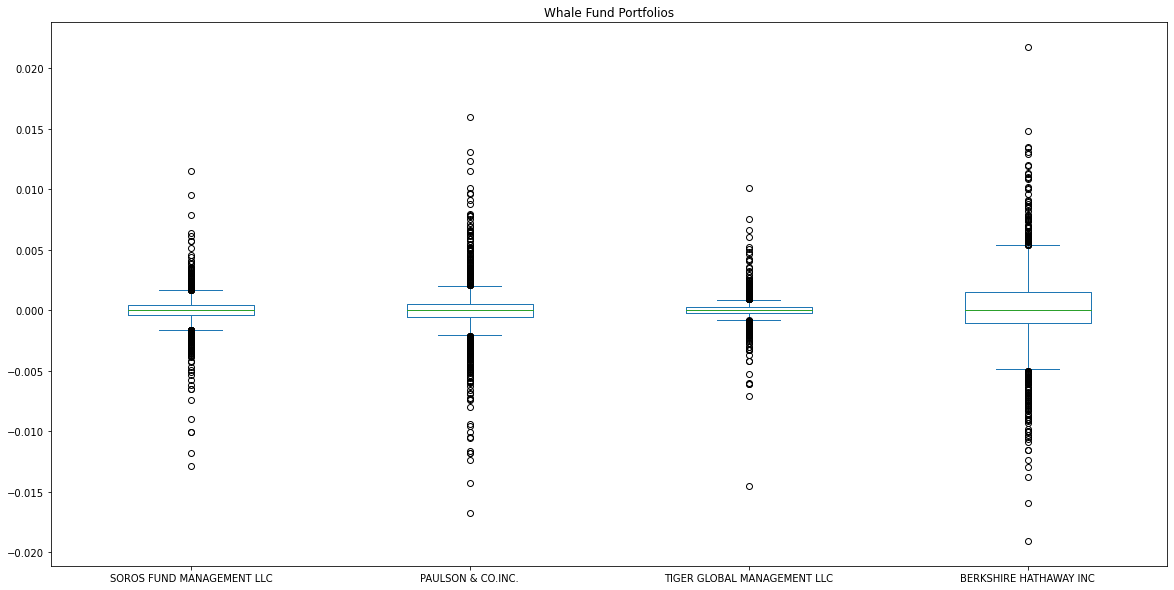

In [22]:
# Create a new DataFrame containing only the 4 fund portfolios then display a box plot
whale_fund_portfolio_returns = whales_daily_returns.drop(columns=['S&P 500'])
whale_fund_portfolio_returns.plot.box(figsize=(20,10), title='Whale Fund Portfolios')


**Question** Based on the box plot visualization of just the four fund portfolios, which fund was the most volatile (with the greatest spread) and which was the least volatile (with the smallest spread)?

**Answer** Based on the box plot, it can be seen that Berkshire Hathaway INC was the most volatile while Tiger Global Management INC was the least volatile.

---

### Analyze the Risk

In [24]:
# Calculate standard deviations and sort
whale_std = whales_daily_returns.std()
whale_std.sort_values()

TIGER GLOBAL MANAGEMENT LLC    0.000996
SOROS FUND MANAGEMENT LLC      0.001405
PAULSON & CO.INC.              0.002199
BERKSHIRE HATHAWAY INC         0.003256
S&P 500                        0.011550
dtype: float64

In [25]:
# Calculate annualized standard deviations and sort
whale_annual_std = (whales_daily_returns.std() * np.sqrt(252))
whale_annual_std.sort_values()


TIGER GLOBAL MANAGEMENT LLC    0.015804
SOROS FUND MANAGEMENT LLC      0.022297
PAULSON & CO.INC.              0.034912
BERKSHIRE HATHAWAY INC         0.051692
S&P 500                        0.183345
dtype: float64

<AxesSubplot:title={'center':'Whale 21-Day Rolling Standard Deviation'}, xlabel='date'>

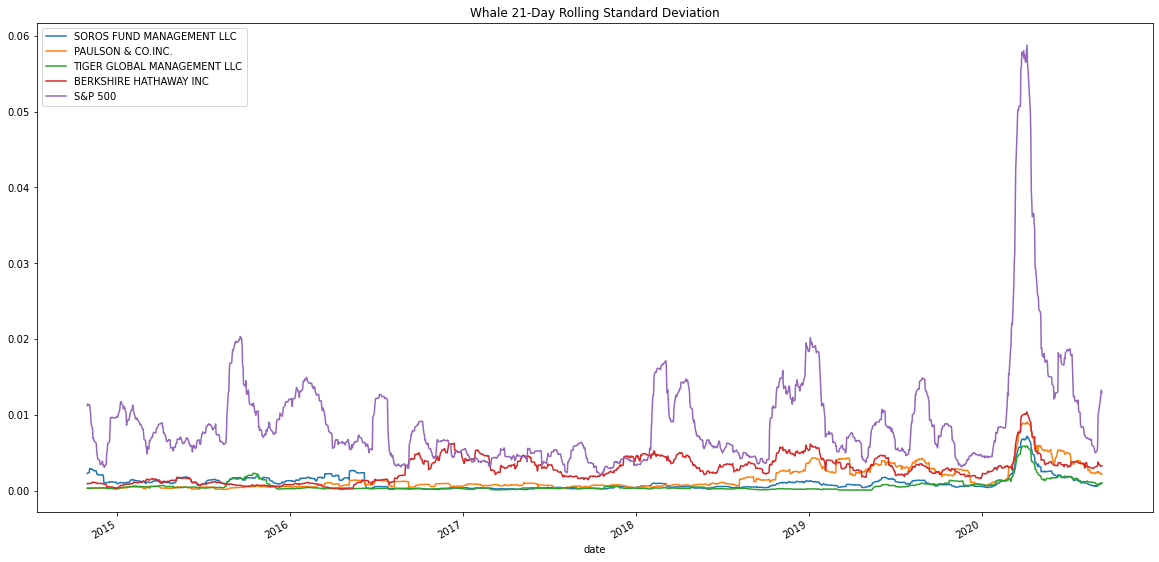

In [21]:
# Calculate a 21-day rolling standard deviation the plot
whale_21rolling_std = whales_daily_returns.rolling(window=21).std()
whale_21rolling_std.plot(figsize=(20,10), title='Whale 21-Day Rolling Standard Deviation')


<AxesSubplot:title={'center':'Fund Portfolios 21-Day Rolling Standard Deviation'}, xlabel='date'>

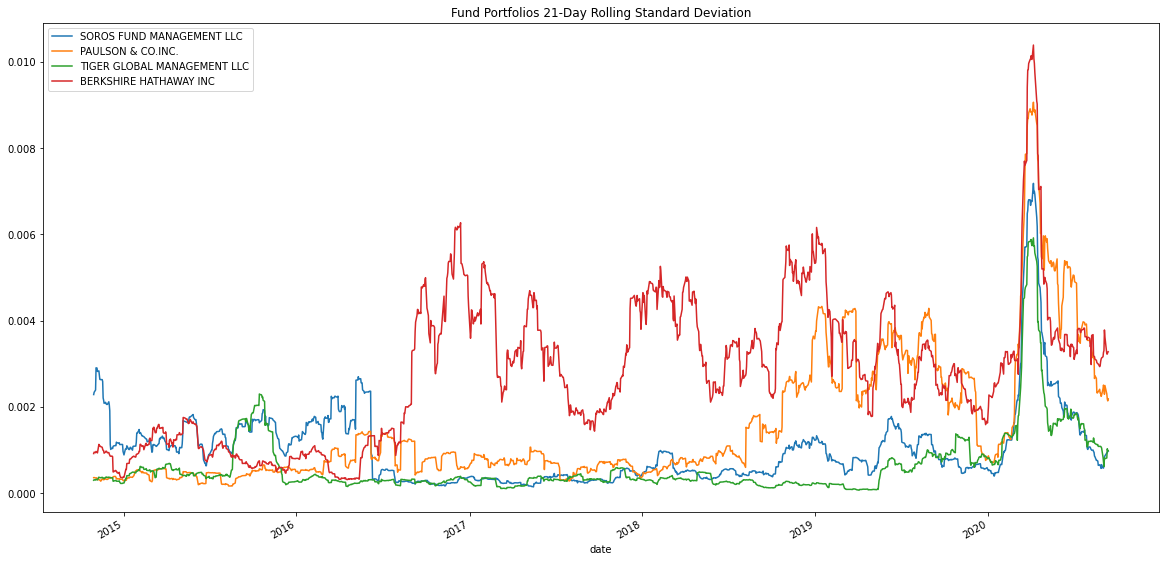

In [23]:
# Rolling standard deviation plot excluding S&P 500
fund_21rolling_std = whale_fund_portfolio_returns.rolling(window=21).std()
fund_21rolling_std.plot(figsize=(20,10), title='Fund Portfolios 21-Day Rolling Standard Deviation')


**Question 1**  Based on the annualized standard deviation, which portfolios pose more risk than the S&P 500?

**Answer 1**  Based on the annualized. standard deviation, none of the portfolios pose more risk than the S&P 500.

**Question 2** Based on the rolling metrics, does the risk of each portfolio increase at the same time that the risk of the S&P 500 increases?

**Answer 2**  Based on the rolling standard deviation of all 5, the risk of each porfolio does not increase at the same time as the risk of the S&P 500.


**Question 3** Based on the rolling standard deviations of only the four fund portfolios, which portfolio poses the most risk? Does this change over time? 

**Answer 3**  Based on the fund rolling standard deviations, Berkshire Hathaway INC poses this most risk but this only became true after the second half of 2016.

---

### Analyze the Risk-Return Profile

In [27]:
# Calculate annual average return data and sort
whale_annual_avg_returns = whales_daily_returns.mean() * 252
whale_annual_avg_returns.sort_values()

PAULSON & CO.INC.             -0.006633
SOROS FUND MANAGEMENT LLC     -0.002281
TIGER GLOBAL MANAGEMENT LLC    0.009151
BERKSHIRE HATHAWAY INC         0.037090
S&P 500                        0.108102
dtype: float64

In [28]:
# Calculate annualized Sharpe ratios and sort
whale_sharpe = whale_annual_avg_returns / whale_annual_std
whale_sharpe.sort_values()


PAULSON & CO.INC.             -0.189998
SOROS FUND MANAGEMENT LLC     -0.102290
TIGER GLOBAL MANAGEMENT LLC    0.579002
S&P 500                        0.589612
BERKSHIRE HATHAWAY INC         0.717512
dtype: float64

<AxesSubplot:title={'center':'Whale Sharpe Ratios'}>

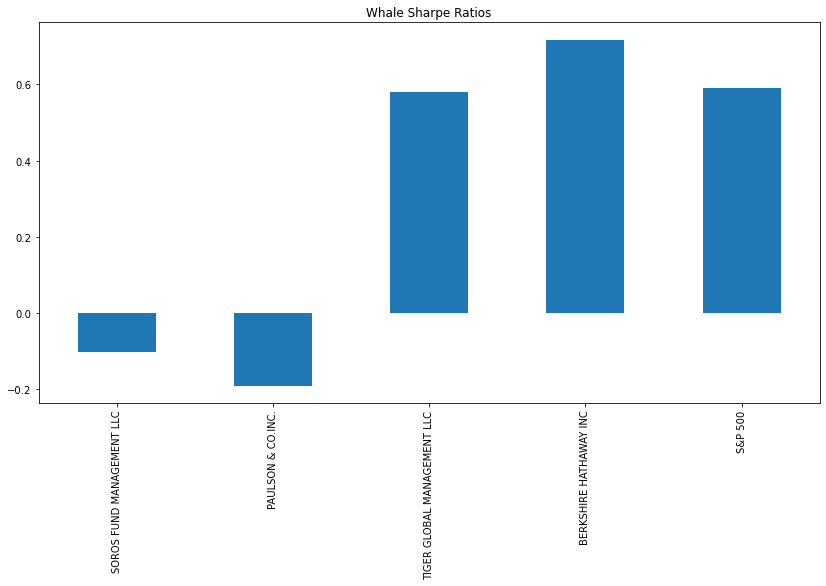

In [29]:
# Box plot of annualized sharpe ratios
whale_sharpe.plot.bar(figsize=(14,7), title=('Whale Sharpe Ratios'))


**Question** Which of the four portfolios offers the best risk-return profile? Which offers the worst?
    
**Answer**  Berkshire Hathaway has the best risk-return profile, while Paulson & CO has the worst.

---

### Diversify the Portfolio

In [48]:
# Calculate 60-day rolling variance of S&P 500
spy_60rolling_variance = whales_daily_returns['S&P 500'].rolling(window=60).var()

In [49]:
# Calculate 60-day rolling covariance of Soros Fund Management LLC
soros_60rolling_covariance = whales_daily_returns['SOROS FUND MANAGEMENT LLC'].rolling(window=60).cov(whales_daily_returns['S&P 500'])
soros_60rolling_covariance.tail()

date
2020-09-04    0.000009
2020-09-08    0.000010
2020-09-09    0.000010
2020-09-10    0.000010
2020-09-11    0.000010
dtype: float64

In [50]:
# Calculate beta using rolling covariance and S&P 500 variance
soros_60rolling_beta = soros_60rolling_covariance / spy_60rolling_variance
soros_60rolling_beta.tail()

date
2020-09-04    0.086995
2020-09-08    0.084035
2020-09-09    0.081876
2020-09-10    0.082832
2020-09-11    0.082554
dtype: float64

In [51]:
# Calculate mean of 60 day rolling beta
soros_60rolling_beta.mean()


0.0686227172631973

<AxesSubplot:title={'center':'Soros Fund Management LLC 60-day rolling beta'}, xlabel='date'>

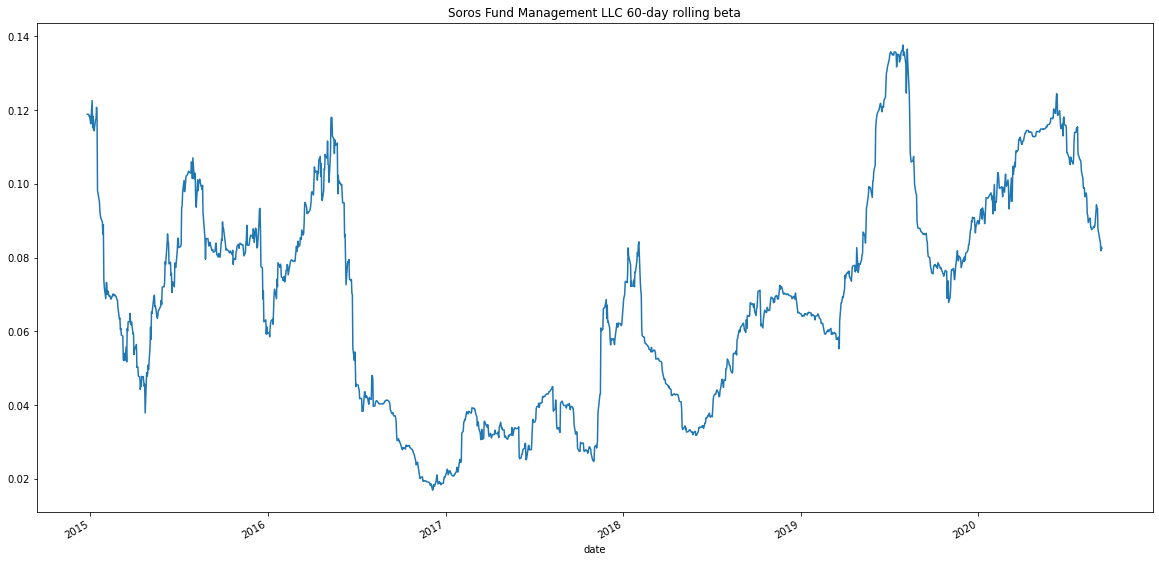

In [52]:
# Plot Soros Management Fund LLC rolling beta 
soros_60rolling_beta.plot(figsize=(20,10), title='Soros Fund Management LLC 60-day rolling beta')


In [53]:
# Calculate 60-day rolling covariance of Berkshire Hathaway INC
berkshire_60rolling_covariance = whales_daily_returns['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(whales_daily_returns['S&P 500'])
berkshire_60rolling_covariance.tail()


date
2020-09-04    0.000021
2020-09-08    0.000023
2020-09-09    0.000024
2020-09-10    0.000024
2020-09-11    0.000024
dtype: float64

In [54]:
# Calculate beta using rolling covariance and S&P 500 variance
berkshire_60rolling_beta = berkshire_60rolling_covariance / spy_60rolling_variance
berkshire_60rolling_beta.tail()

date
2020-09-04    0.207879
2020-09-08    0.203051
2020-09-09    0.196632
2020-09-10    0.197543
2020-09-11    0.199411
dtype: float64

In [55]:
# Calculate mean of 60 day rolling beta
berkshire_60rolling_beta.mean()


0.2214986101354593

<AxesSubplot:title={'center':'Berkshire Hathaway INC 60-day rolling beta'}, xlabel='date'>

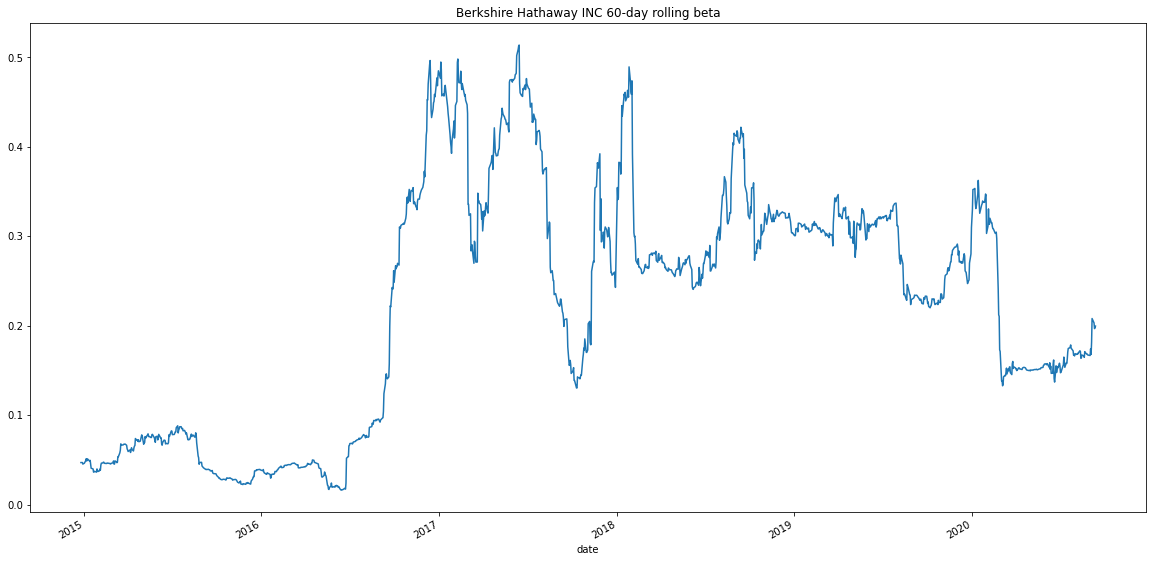

In [56]:
# Plot Berkshire Hathaway INC rolling beta
berkshire_60rolling_beta.plot(figsize=(20,10), title='Berkshire Hathaway INC 60-day rolling beta')


**Question 1** Which of the two portfolios seem more sensitive to movements in the S&P 500?
    
**Answer 1** Based on the above analysis, Berkshire Hathaway INC seems to be more sensitive to movements in the S&P 500.


**Question 2** Which of the two portfolios do you recommend for inclusion in your firm’s suite of fund offerings?
    
**Answer 2**  I would recommend the inclusion of Berkshire Hathaway INC to my firm's suit of fund offerings due to its higher Sharpe ration.

---